In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['freq', 'angle', 'chord', 'velocity', 'suction', 'sound']

df = pd.read_csv('csv/airfoil_self_noise.dat',sep='\t',header=None)
df.head()
df.columns = columns
df.head()

,freq,angle,chord,velocity,suction,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
_X = df.iloc[:,:5]
_X.head()
_Y = df.iloc[:,5]
_Y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: sound, Length: 1503, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(_X, _Y, random_state=1, test_size=.3)

_AxisX = range(x_test.shape[0])
_AxisY = y_test

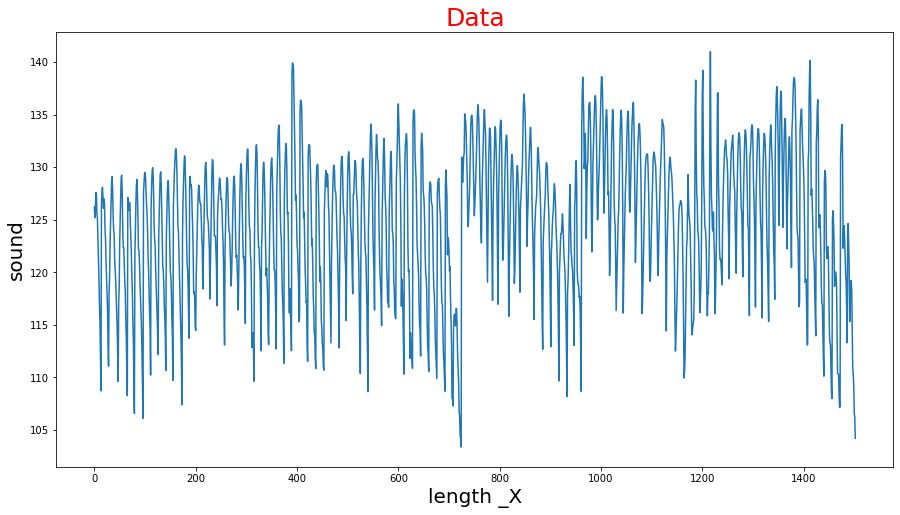

In [5]:
#Graficamos datos originales

fig, ax = plt.subplots()
ax.plot(range(_X.shape[0]), _Y, '-')
fig.set_size_inches(15,8)
plt.title('Data', size=25, c='red')
plt.xlabel('length _X', size=20)
plt.ylabel('sound',size=20)
plt.show()

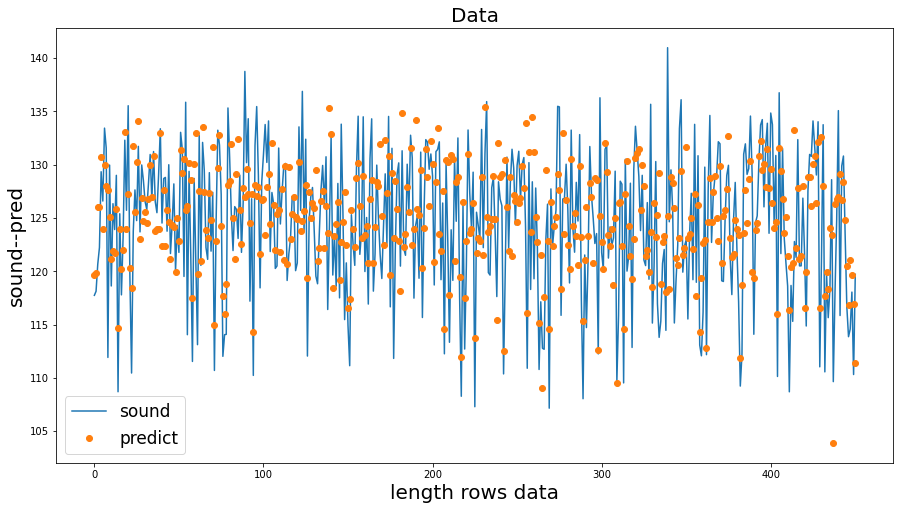

In [6]:
#LinReg
from sklearn.linear_model import LinearRegression
#en lin reg los valores no hay valores de regularizacion

linreg = LinearRegression().fit(x_train, y_train)
linpred = linreg.predict(x_test)

fig_lr, ax_lr = plt.subplots()
ax_lr.plot(_AxisX, _AxisY, '-', label='sound')
ax_lr.plot( _AxisX, linpred,'o',label='predict')
fig_lr.set_size_inches(15, 8)
plt.title('Data',size=20)
plt.xlabel('length rows data', size=20)
plt.ylabel('sound--pred', size=20)
plt.legend(loc=3,fontsize=17)
plt.show()

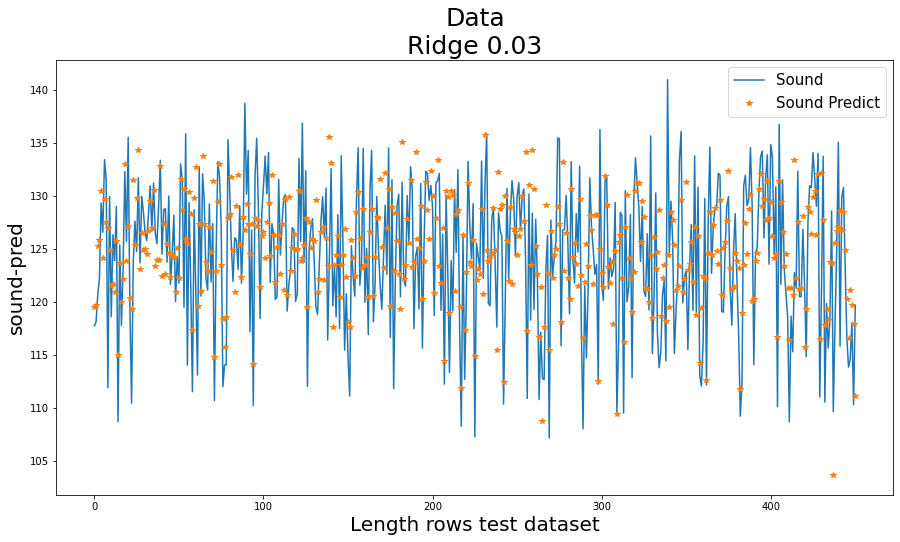

In [37]:
#ridge
'''
aca si usamos mean_squared_error(error cuadratico medio), para hallar el 
valor de alpha en el cual el error cuadratico medio sea minimo
'''

from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Ridge

ridge_alpha = np.linspace(0,1,100)
_mseridge = []

for i in ridge_alpha:
    
    ridge = Ridge(alpha=i)
    ridge.fit(x_train, y_train)
    ridge_pred = ridge.predict(x_test)
    
    _mseridge.append(mean_squared_error(y_test, ridge_pred))
    
df_ridgeE = pd.DataFrame({'Error':_mseridge, 'Alpha':ridge_alpha})
df_ridgeE.head()
df_ridgeE[df_ridgeE['Error']==df_ridgeE['Error'].min()]
alpha = ridge_alpha[3]
alpha
#Hasta aca ya tenemos el valor de alpha donde el mean swuared error is min
#graficamos data

ridge = Ridge(alpha=alpha).fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

fig_rg, ax_rg = plt.subplots()
ax_rg.plot(_AxisX, _AxisY,'-', label='Sound')
ax_rg.plot(_AxisX, ridge_pred, '*', label='Sound Predict')
fig_rg.set_size_inches(15, 8)
plt.title('Data\nRidge {:.2f}'.format(alpha),size=25)
plt.xlabel('Length rows test dataset', size=20)
plt.ylabel('sound-pred',size=20)
plt.legend(loc=1, fontsize=15)
plt.show()


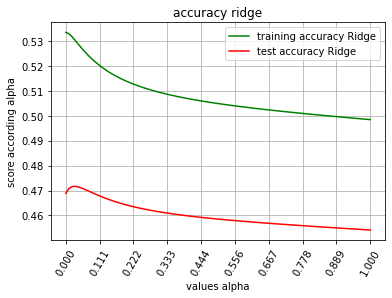

In [61]:
#accuracy ridge

acctrain_ridge = []
acctest_ridge = []

for i in ridge_alpha:
    
    ridge = Ridge(alpha=i).fit(x_train, y_train)
    acctrain_ridge.append(ridge.score(x_train,y_train))
    acctest_ridge.append(ridge.score(x_test,y_test))
    
plt.plot(ridge_alpha, acctrain_ridge, c='green',label='training accuracy Ridge')
plt.plot(ridge_alpha, acctest_ridge, c='red', label='test accuracy Ridge')
plt.legend(loc=1)
plt.title('accuracy ridge')
plt.xlabel('values alpha')
plt.ylabel('score according alpha', size=10)
plt.xticks(np.linspace(0,1,10),rotation=60)
plt.grid()
plt.show()


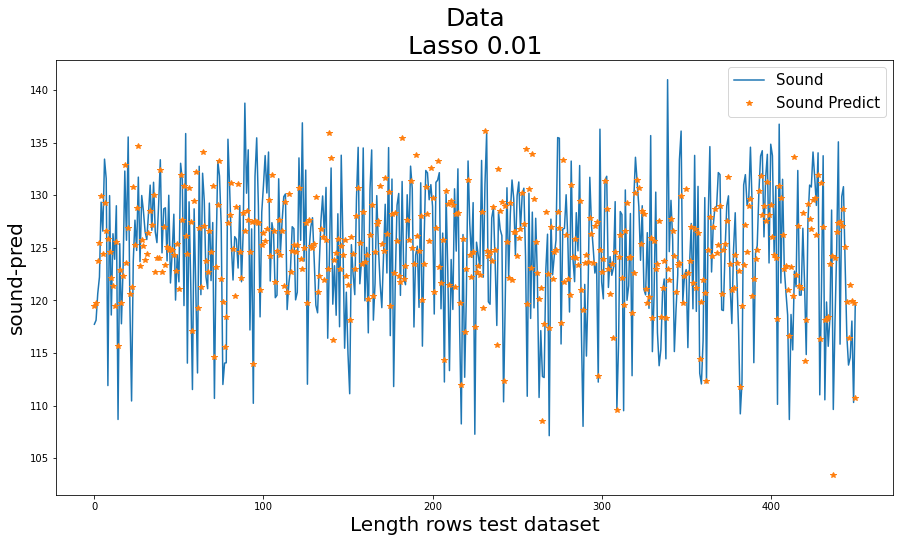

In [73]:
# For Lasso

from sklearn.linear_model import Lasso

alpha_lasso = np.linspace(.01, 1, 100)
_mselasso = []

for j in alpha_lasso:
    
    lasso = Lasso(alpha=j).fit(x_train, y_train)
    lasso_pred = lasso.predict(x_test)
    _mselasso.append(mean_squared_error(y_test, lasso_pred))
    
    
df_mselasso = pd.DataFrame({'MSE':_mselasso, 'alpha':alpha_lasso})
df_mselasso.head()

df_mselasso[df_mselasso['MSE']==df_mselasso['MSE'].min()]
alpha = alpha_lasso[0]
alpha

lasso = Lasso(alpha=alpha).fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

fig_lss, ax_lss = plt.subplots()
ax_lss.plot(_AxisX, _AxisY,'-', label='Sound')
ax_lss.plot(_AxisX, lasso_pred, '*', label='Sound Predict')
fig_lss.set_size_inches(15, 8)
plt.title('Data\nLasso {:.2f}'.format(alpha),size=25)
plt.xlabel('Length rows test dataset', size=20)
plt.ylabel('sound-pred',size=20)
plt.legend(loc=1, fontsize=15)
plt.show()

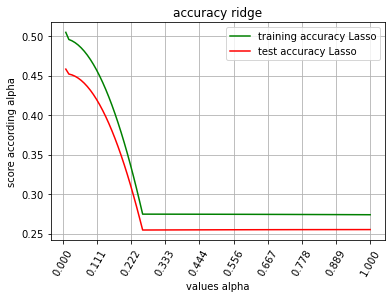

In [76]:
#accuracy lasso

acctrain_lasso = []
acctest_lasso = []

for i in alpha_lasso:
    
    lasso = Lasso(alpha=i).fit(x_train, y_train)
    acctrain_lasso.append(lasso.score(x_train,y_train))
    acctest_lasso.append(lasso.score(x_test,y_test))
    
plt.plot(alpha_lasso, acctrain_lasso, c='green',label='training accuracy Lasso')
plt.plot(alpha_lasso, acctest_lasso, c='red', label='test accuracy Lasso')
plt.legend(loc=1)
plt.title('accuracy ridge')
plt.xlabel('values alpha')
plt.ylabel('score according alpha', size=10)
plt.xticks(np.linspace(0,1,10),rotation=60)
plt.grid()
plt.show()


ValueError: Unknown label type: 'continuous'